# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

# Image exploration

36

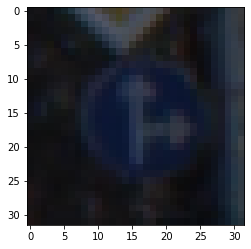

In [11]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

# Data preparation

In [12]:
# shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [21]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [22]:
X_train_gray.shape

(34799, 32, 32, 1)

In [23]:
X_test_gray.shape

(12630, 32, 32, 1)

In [24]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [25]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [26]:
X_train_gray_norm

array([[[[-0.796875  ],
         [-0.8046875 ],
         [-0.83072917],
         ...,
         [-0.83854167],
         [-0.84895833],
         [-0.84635417]],

        [[-0.79427083],
         [-0.81510417],
         [-0.828125  ],
         ...,
         [-0.8359375 ],
         [-0.83854167],
         [-0.84114583]],

        [[-0.80989583],
         [-0.8203125 ],
         [-0.8203125 ],
         ...,
         [-0.84635417],
         [-0.85416667],
         [-0.85416667]],

        ...,

        [[-0.78385417],
         [-0.80989583],
         [-0.80989583],
         ...,
         [-0.84375   ],
         [-0.84114583],
         [-0.84635417]],

        [[-0.79947917],
         [-0.81770833],
         [-0.8203125 ],
         ...,
         [-0.84635417],
         [-0.84895833],
         [-0.84114583]],

        [[-0.80729167],
         [-0.81510417],
         [-0.79947917],
         ...,
         [-0.84895833],
         [-0.84114583],
         [-0.82552083]]],


       [[[-0.90885417],


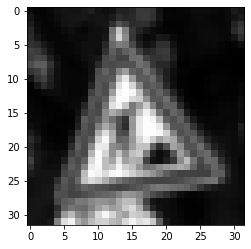

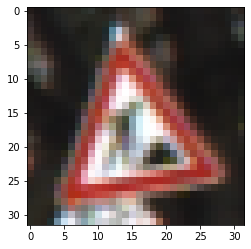

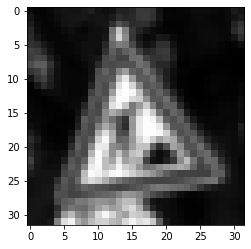

In [30]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

# Model training

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [32]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax'))



In [34]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [39]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size=500,
             epochs=5,
             verbose=1,
             validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/5
70/70 [==============================] - 16s 225ms/step - loss: 0.4134 - accuracy: 0.8888 - val_loss: 0.7100 - val_accuracy: 0.7943
Epoch 2/5
70/70 [==============================] - 14s 195ms/step - loss: 0.3580 - accuracy: 0.9065 - val_loss: 0.6712 - val_accuracy: 0.8102
Epoch 3/5
70/70 [==============================] - 14s 196ms/step - loss: 0.3142 - accuracy: 0.9193 - val_loss: 0.6781 - val_accuracy: 0.8098
Epoch 4/5
70/70 [==============================] - 13s 192ms/step - loss: 0.2828 - accuracy: 0.9259 - val_loss: 0.6763 - val_accuracy: 0.8159
Epoch 5/5
70/70 [==============================] - 13s 191ms/step - loss: 0.2476 - accuracy: 0.9370 - val_loss: 0.6664 - val_accuracy: 0.8172


# Model evaluation

In [43]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.0036 - accuracy: 0.8118
Test Accuracy: 0.8117973208427429


In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
accuracy = history.history['accuracy']
val_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


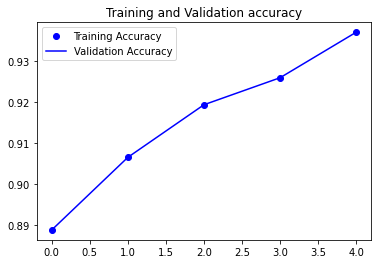

In [48]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

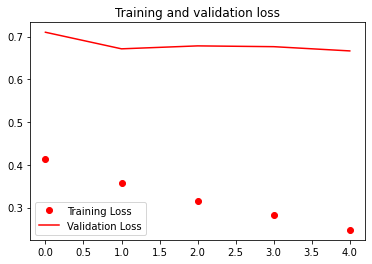

In [49]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


In [50]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

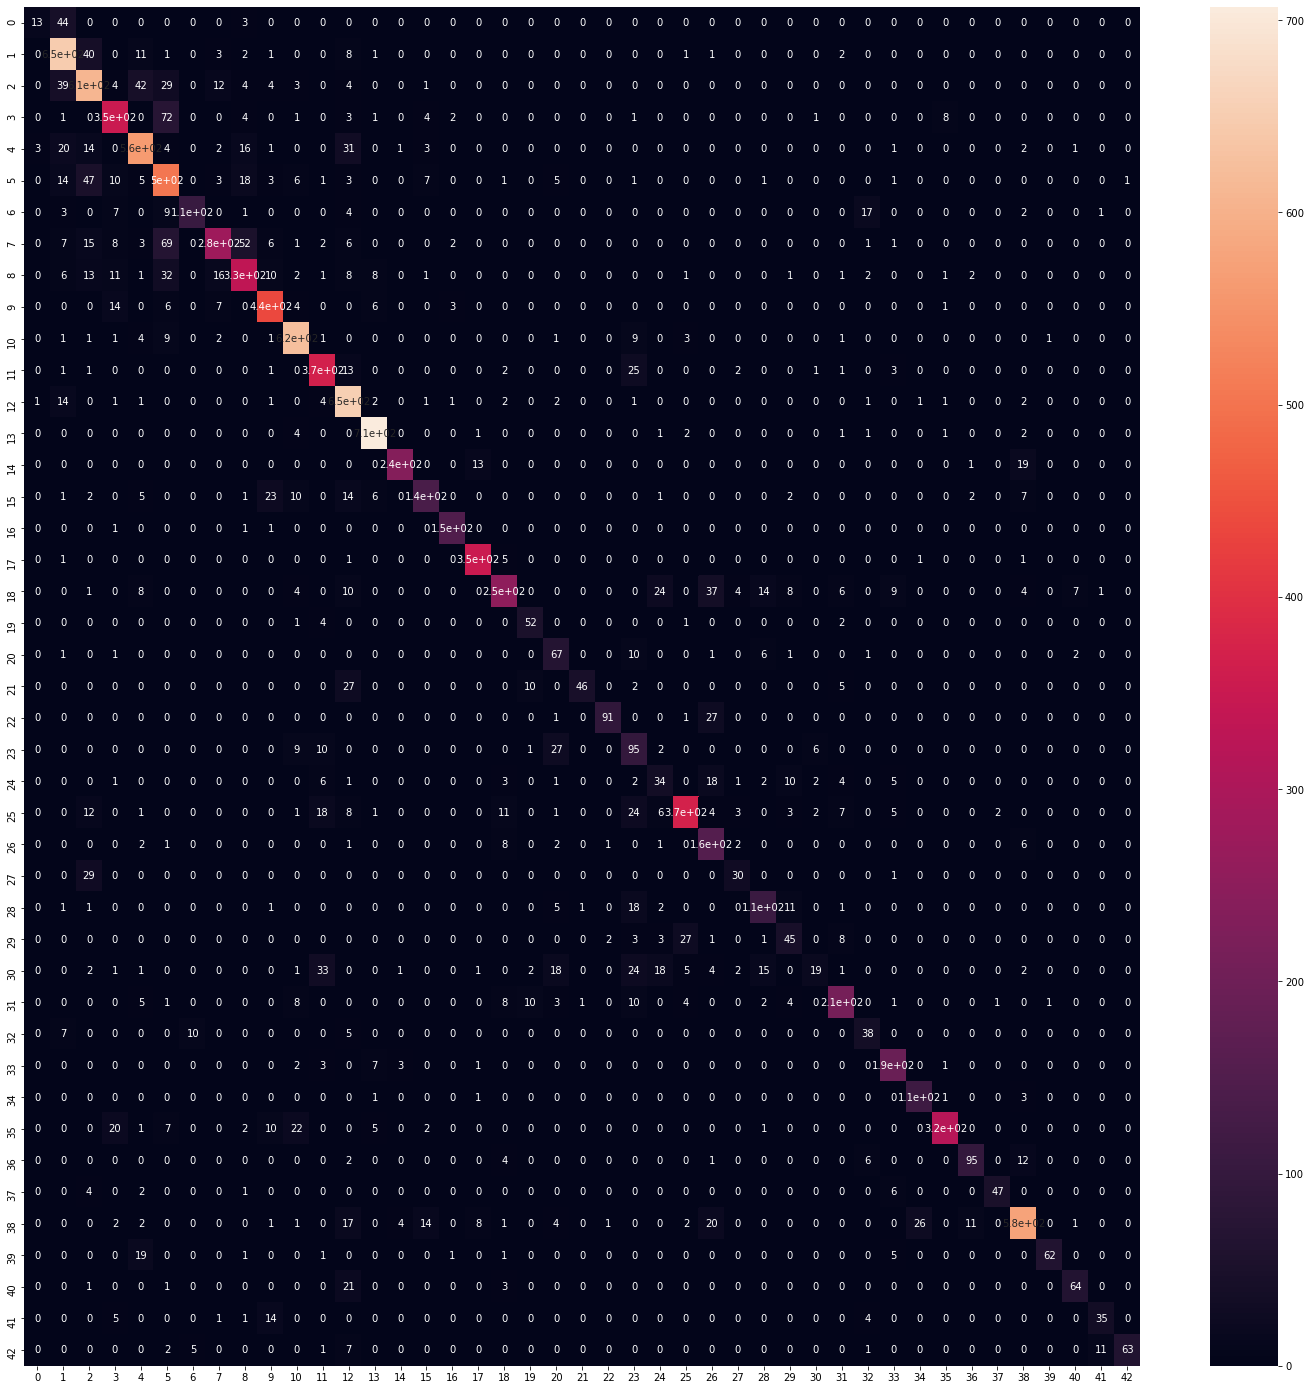

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

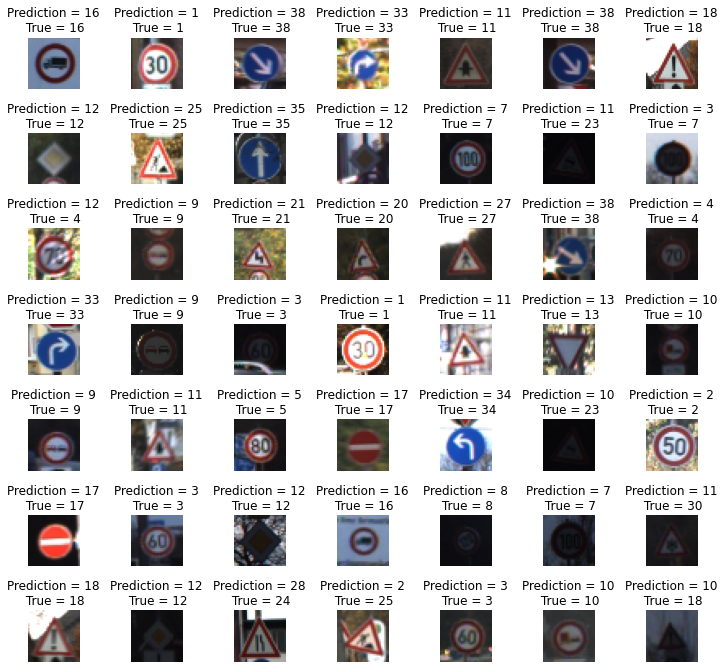

In [57]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)